In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


import sklearn

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kgulina","key":"5102d54b697e7f079d383df9de226950"}'}

In [ ]:
#найти и скачать многомерные данные для классификации
!mkdir ~/.kaggle #создание папки
!cp kaggle.json ~/.kaggle #копия этого файла в эту папку
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download 'bharath011/heart-disease-classification-dataset'

  0% 0.00/15.8k [00:00<?, ?B/s]
100% 15.8k/15.8k [00:00<00:00, 22.2MB/s]


In [ ]:
!unzip heart-disease-classification-dataset.zip

Archive:  heart-disease-classification-dataset.zip
  inflating: Heart Attack.csv        


In [ ]:
!pip install scikit-plot

In [ ]:
data = pd.read_csv("Heart Attack.csv")
print(data.shape)
data.head()

(1319, 9)


,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [ ]:
data.columns

Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin', 'class'],
      dtype='object')

In [ ]:
data.isna().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [ ]:
from google.colab import drive
drive.mount('/content/heart_attack')

Mounted at /content/heart_attack


In [ ]:
data['class']

0       negative
1       positive
2       negative
3       positive
4       negative
          ...   
1314    negative
1315    positive
1316    positive
1317    positive
1318    positive
Name: class, Length: 1319, dtype: object

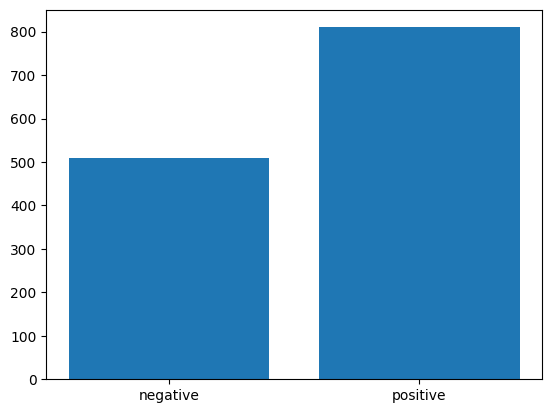

In [ ]:
#визуализация

b_x = list(set(data['class']))
b_y = [sum(data['class']==b_x[0]), sum(data['class']==b_x[1])]
plt.bar(b_x, b_y)
plt.show()


fig = go.Figure()
fig.add_trace(go.Box(y=data['age'], name='age_all'))
fig.add_trace(go.Box(y=data[data['class']=='positive']['age'], name='age_negative'))
#fig = px.box(data, 'age')
fig.show()


In [ ]:
#выделим категориальные признаки и числовые
#метод select_dtypes возвращает подмножество столбцов фрейма данных на основе dtypes столбцов
categorical_cols = data.select_dtypes(include=["object"]).columns.tolist()
print(len(categorical_cols))
categorical_cols

1


['class']

In [ ]:
data['class'] = data['class'].map({'negative': 0, 'positive': 1})

In [ ]:
numeric_cols = data.select_dtypes(exclude=["object"]).columns.tolist()
print(len(numeric_cols))
numeric_cols

9


['age',
 'gender',
 'impluse',
 'pressurehight',
 'pressurelow',
 'glucose',
 'kcm',
 'troponin',
 'class']

In [ ]:
#посмотрим, какое количество уникальных значений имеют категориальные признаки и числовые
unic_categ = pd.DataFrame([[i,data[i].nunique()] for i in categorical_cols], columns=['column_name','num_unique']).sort_values(by=['num_unique'])
unic_categ

,column_name,num_unique
0,class,2


In [ ]:
target_name = 'class'

In [ ]:
from sklearn.model_selection import train_test_split
#разделить на обучающую и тестовую выборки

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(target_name, axis=1),
    data[target_name],
    test_size=0.2,
    random_state=1,
)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print()
print(X_test.shape)
print(y_test.shape)

(1055, 8)
(1055,)

(264, 8)
(264,)


# Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression
#обучить логистическую регрессию

In [ ]:
#сделаем одну выборку с нормализованными численными признаками
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train)
X_test_num_scaled = scaler.transform(X_test)

In [ ]:
np.random.seed(1)
model_lr = LogisticRegression()

In [ ]:
y_train

710     1
1258    0
435     1
987     1
1286    0
       ..
715     1
905     0
1096    1
235     1
1061    1
Name: class, Length: 1055, dtype: int64

In [ ]:
model_lr.fit(X_train_num_scaled, y_train)

LogisticRegression()

In [ ]:
pred_lr = model_lr.predict(X_test_num_scaled) # получение предсказаний на тестовой выборке

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_lr)

0.7916666666666666

In [ ]:
print(len(pred_lr))
sum(i==j for i, j, in zip(pred_lr, y_test))

264


209

In [ ]:
#вывести метрики accuracy, f1-score, PR и ROC кривые, PR и ROC AUC, матрицу ошибок
#может пригодиться from sklearn.metrics import classification_report

from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
# для построения кривых можно воспользоваться from sklearn.preprocessing import label_binarize
# для построения кривых необходимо использовать метки тергета 0 и 1 в качестве первого аргумента
# и вероятности попадания в класс, можно получить, используя predict_proba

classification_report

Support: количество наблюдений для каждого класса

Подходы к усреднению метрик

micro = accuracy (сумма верных срабатываний для всех классов, деленная на все объекты)

Macro avg: среднее арифметическое показателя между классами

weighted avg: средневзвешенное значение рассчитывается путем произведения оценки показателя каждого класса на его количество наблюдений, последующее суммирование результата и деление результата на сумму наблюдений

Зачем?

* Удобно, когда классов очень много
* micro - когда классы сбалансированы
* macro - каждому классу даем одинаковый вес, вне зависимости от дисбаланса классов, хорошо использовать, если нам важен меньший класс, например, мошеннические транзакции, которых мало, а хороших транзакций много, при плохой модели мы получим низкую macro метрику
* weighted - учитываем размер каждого класса, даем класса вес, согласно их количеству. Если меньший класс нам не важен, то мы можем им принебречь при подсчете метрики. Если macro сильно среагирует на ошибки на малом классе, то weighted нет.


In [ ]:
report = classification_report(y_test, model_lr.predict(X_test_num_scaled), target_names=['positive', 'negative'])
print(report)

              precision    recall  f1-score   support

    positive       0.77      0.69      0.73       106
    negative       0.80      0.86      0.83       158

    accuracy                           0.79       264
   macro avg       0.79      0.77      0.78       264
weighted avg       0.79      0.79      0.79       264



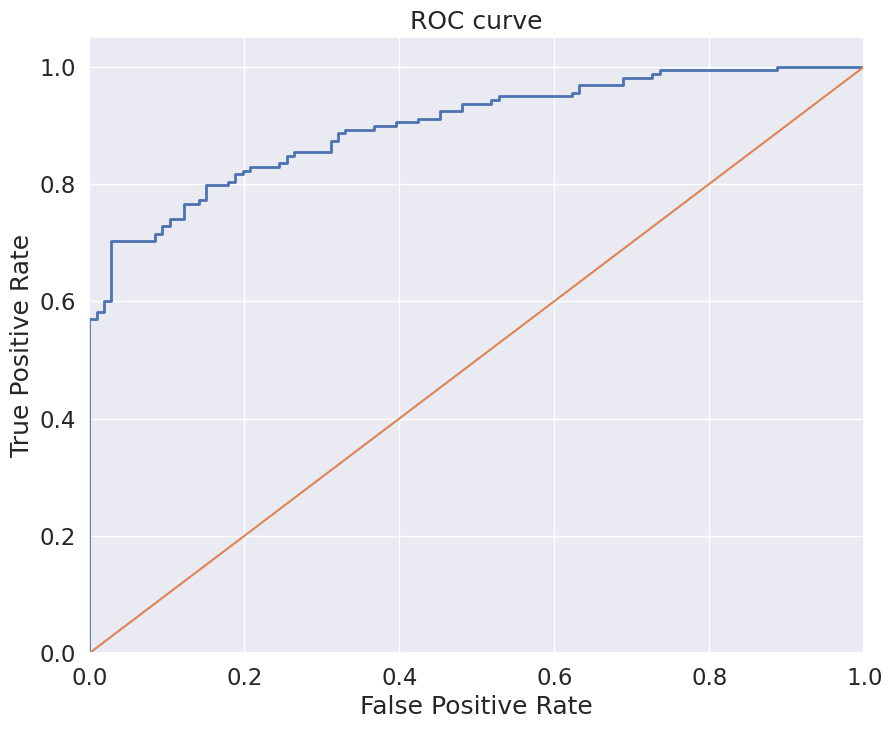

In [ ]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, model_lr.predict_proba(X_test_num_scaled)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

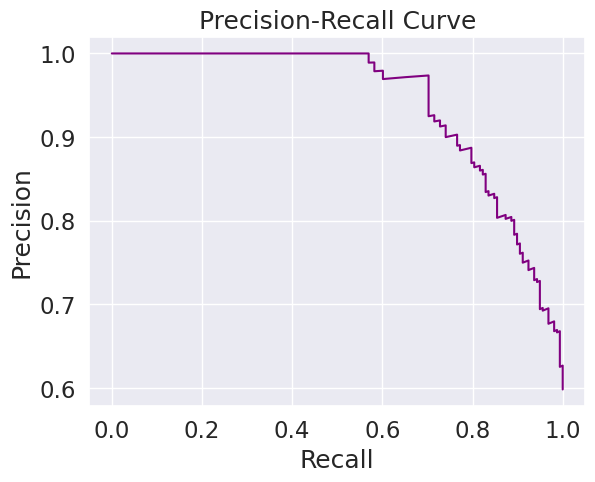

In [ ]:
f1 = []
pr, rec, porog = precision_recall_curve(y_test,model_lr.predict_proba(X_test_num_scaled)[:, 1])
for i in range(len(pr)):
    f1.append(2*(pr[i]*rec[i])/(pr[i]+rec[i]))
f1.append(porog)
pr

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(rec, pr, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

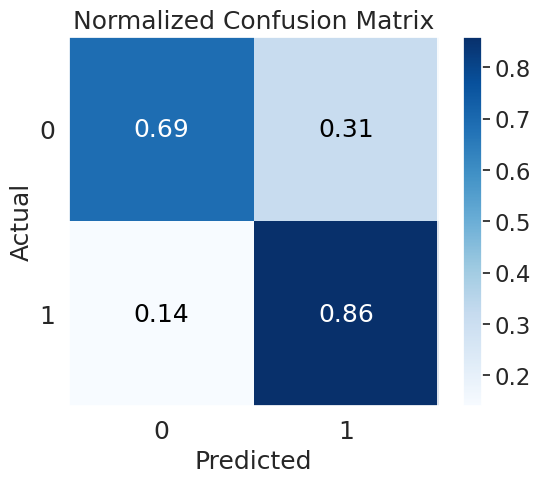

In [ ]:
import scikitplot as skplt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_lr)
skplt.metrics.plot_confusion_matrix(y_test, pred_lr, normalize=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

# ПОЧЕМУ normalize=False/True???

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# использовать алгоритм KNN из sklearn

In [ ]:
number_of_neighbors = np.arange(10) #количество соседей для перебора
#инициализировать модель
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, dict(n_neighbors=number_of_neighbors), cv=10, scoring='accuracy', return_train_score=False)#использовать GridSearchCV для поиска оптимального гиперпараметра

In [ ]:
grid_search.fit(X_train_num_scaled, y_train) #обучение модели

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy')

In [ ]:
grid_search.best_estimator_ # лучшая модель получается при k = ?

KNeighborsClassifier(n_neighbors=9)

In [ ]:
knn = KNeighborsClassifier(9)
knn.fit(X_train_num_scaled, y_train)
knn_pred = knn.predict(X_test_num_scaled) # результат работы модели на тесте

In [ ]:
#вывести метрики accuracy, f1-score, PR и ROC кривые, PR и ROC AUC, матрицу ошибок

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, knn_pred)

0.7386363636363636

In [ ]:
report = classification_report(y_test, knn_pred, target_names=['positive', 'negative'])
print(report)

              precision    recall  f1-score   support

    positive       0.68      0.65      0.67       106
    negative       0.77      0.80      0.79       158

    accuracy                           0.74       264
   macro avg       0.73      0.72      0.73       264
weighted avg       0.74      0.74      0.74       264



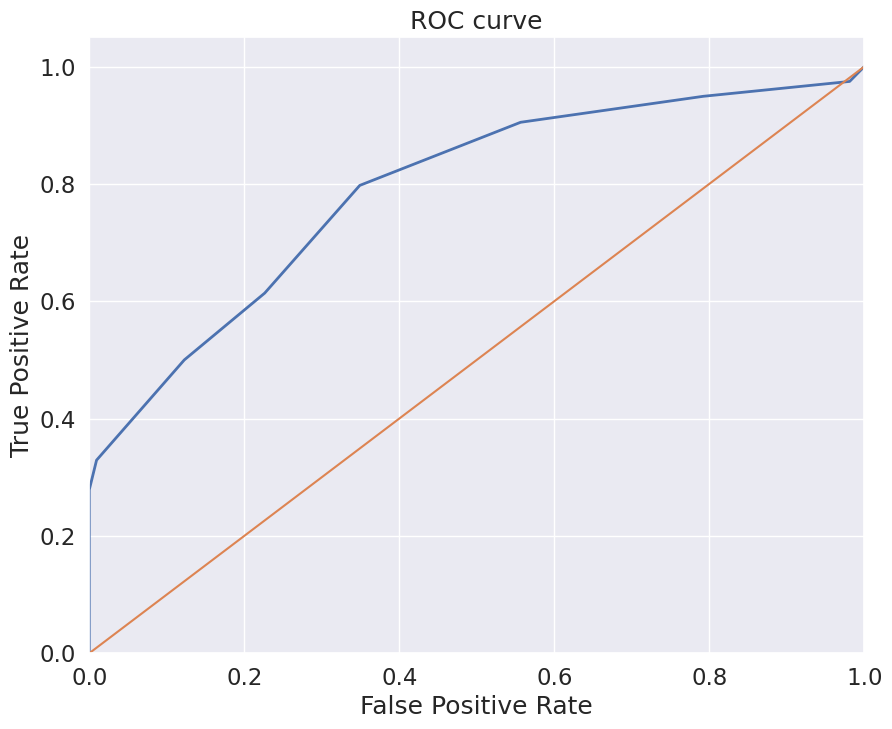

In [ ]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test_num_scaled)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

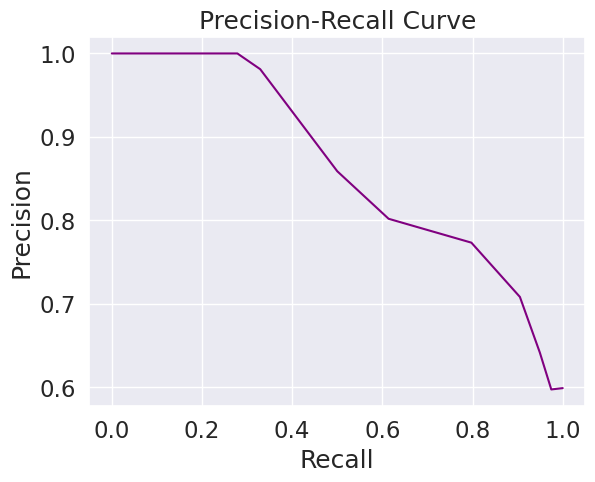

In [ ]:
f1 = []
pr, rec, porog = precision_recall_curve(y_test,knn.predict_proba(X_test_num_scaled)[:, 1])
for i in range(len(pr)):
    f1.append(2*(pr[i]*rec[i])/(pr[i]+rec[i]))
f1.append(porog)
pr

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(rec, pr, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

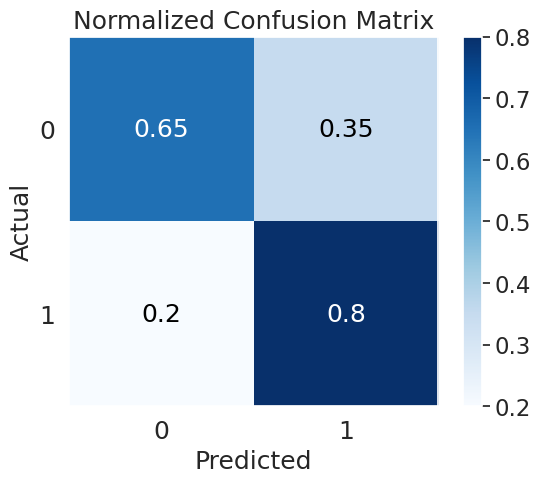

In [ ]:
import scikitplot as skplt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, knn_pred)
skplt.metrics.plot_confusion_matrix(y_test, knn_pred, normalize=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
#использовать SVM для решения задачи классификации
param_kernel = ('linear', 'rbf', "poly", "sigmoid") # ядра

#аналогично как и для KNN, найти оптимальное ядро
#вывести метрики

In [ ]:
for i in range(len(param_kernel)):
    clf = SVC(kernel=param_kernel[i], probability=True)
    clf.fit(X_train_num_scaled, y_train)
    clf_pred = clf.predict(X_test_num_scaled)
    print(f'{i}: {accuracy_score(y_test, clf_pred)}')

0: 0.8143939393939394
1: 0.7689393939393939
2: 0.7272727272727273
3: 0.7462121212121212


In [ ]:
clf = SVC(kernel=param_kernel[0], probability=True)
clf.fit(X_train_num_scaled, y_train)
clf_pred = clf.predict(X_test_num_scaled)

In [ ]:
report = classification_report(y_test, clf_pred, target_names=['positive', 'negative'])
print(report)

              precision    recall  f1-score   support

    positive       0.77      0.77      0.77       106
    negative       0.85      0.84      0.84       158

    accuracy                           0.81       264
   macro avg       0.81      0.81      0.81       264
weighted avg       0.81      0.81      0.81       264



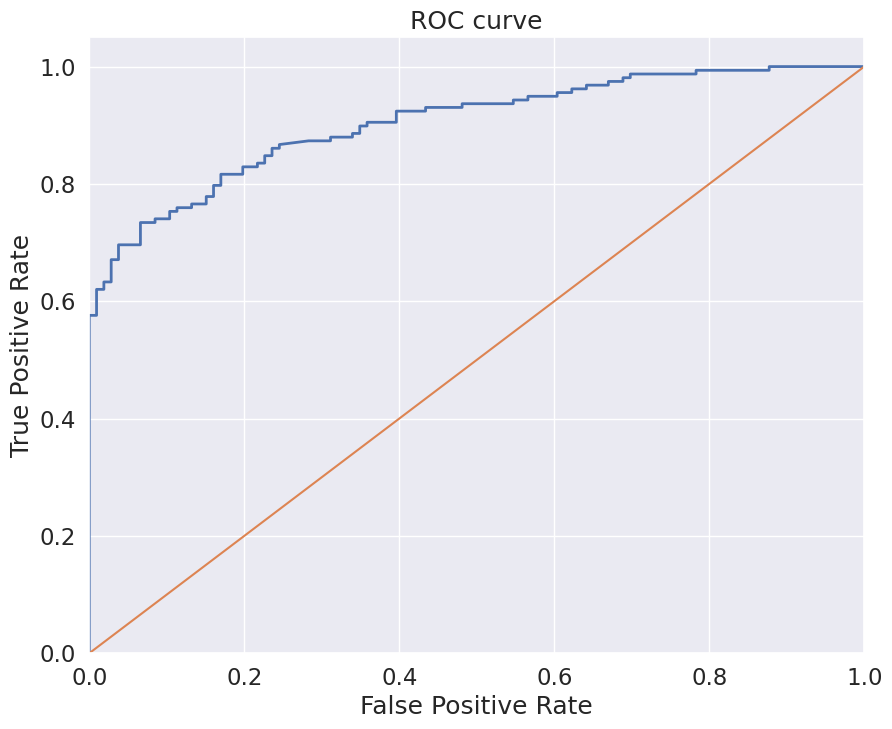

In [ ]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test_num_scaled)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

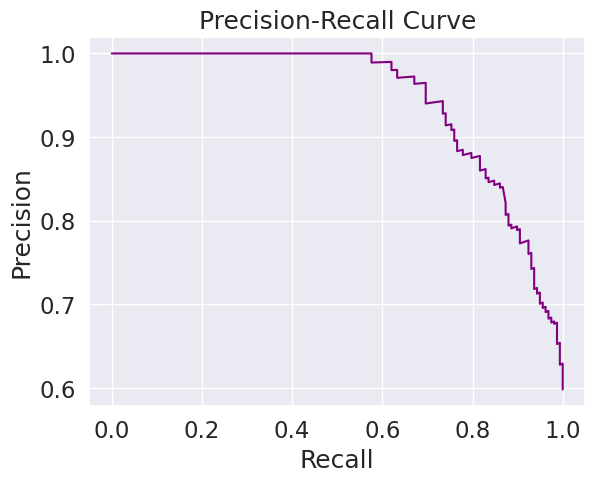

In [ ]:
f1 = []
pr, rec, porog = precision_recall_curve(y_test,clf.predict_proba(X_test_num_scaled)[:, 1])
for i in range(len(pr)):
    f1.append(2*(pr[i]*rec[i])/(pr[i]+rec[i]))
f1.append(porog)
pr

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(rec, pr, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

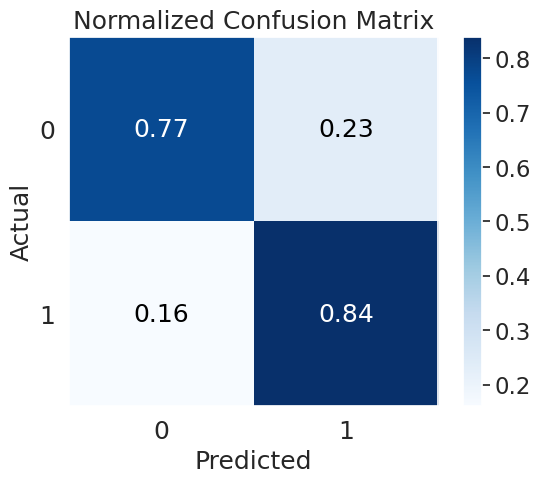

In [ ]:
cm = confusion_matrix(y_test, clf_pred)
skplt.metrics.plot_confusion_matrix(y_test, clf_pred, normalize=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()